## Importando os dados

In [1]:
# abrir a conexão com o banco de dados
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
conn = sqlite3.connect("database.db")

In [2]:
# consulta os dados no banco de dados
consulta_atividade = """

    SELECT
     *
    FROM flight_activity fa LEFT JOIN flight_loyalty_history fh ON (fa.loyalty_number = fh.loyalty_number)
    """
df_atividade = pd.read_sql_query(consulta_atividade, conn)

In [ ]:
df_atividade.head()

## JOIN

In [ ]:
consulta_atividade = """
  SELECT
    fh.loyalty_number,
    fh.country,
    fh.city,
    fa.year,
    fa.month,
    fa.flights_booked

  FROM
    flight_loyalty_history fh JOIN flight_activity fa ON (fh.loyalty_number = fa.loyalty_number)


"""
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade.head()

In [ ]:
df_atividade.info()

In [ ]:
df_atividade.shape

## Exercícios da Aula 02

In [ ]:
# EXERCÍCIO 1
# selecionar o número do cartão de fidelidade, a cidade e o
# gênero dos passageiros que tem o cartão Star mas nunca realizaram
# nenhuma viagem
consulta_atividade = """

     SELECT
      fa.loyalty_number,
      fa.distance,
      fh.city,
      fh.gender,
      fh.loyalty_card
     FROM
      flight_activity fa LEFT JOIN flight_loyalty_history fh ON (fh.loyalty_number = fa.loyalty_number)
     WHERE
        loyalty_card == 'Star' AND distance == 0
     """
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade

In [ ]:
# EXERCÌCIO 2
# selecionar os números do cartão de fidelidade, o gênero e a cidade de todos os
# passageiros do sexo feminino que moram na cidade de Toronto, fizeram mais de 30
# viagens no total e tem o cartão de fidelidade do tipo Aurora.
consulta_atividade = """

     SELECT
      fa.loyalty_number,
      fh.gender,
      fh.city,
      fa.total_flights,
      fh.loyalty_card
     FROM
      flight_activity fa LEFT JOIN flight_loyalty_history fh
      ON (fh.loyalty_number = fa.loyalty_number)
     WHERE
        gender == 'Female'
        AND city == 'Toronto'
        AND total_flights == 30
        AND loyalty_card == 'Aurora'
     """
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade

In [ ]:
# EXERCÌCIO 3
# Selecionar os números do cartão de fidelidade, o tipo do cartão, o gênero e os
# pontos acumulados, dos passageiros com salário acima de 13200, estado civil como
# casado e nível acadêmico como mestrado e número de voos agendados igual ao
# número total de voos.
consulta_atividade = """

     SELECT
      fa.loyalty_number,
      fh.loyalty_card,
      fh.gender,
      fa.points_accumulated

     FROM
      flight_activity fa LEFT JOIN flight_loyalty_history fh
      ON (fh.loyalty_number = fa.loyalty_number)
     WHERE
        salary > 13200
        AND marital_status == 'Married'
        AND education == 'Master'
        AND flights_booked = total_flights
     """
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade

In [ ]:
# EXERCÌCIO 4
# Qual o valor da soma total da distância percorrida pelos voos registrados na
# planilha de dados?

df_atividade.loc[:, 'distance'].sum()

490350765

In [ ]:
# EXERCÌCIO 5
# Qual o salário médio dos passageiros?
consulta_atividade = "SELECT * FROM flight_loyalty_history"
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade.loc[:, 'salary'].mean()

79245.6094087527

In [ ]:
# EXERCÌCIO 6
# Qual o valor total de pontos acumulados?
consulta_atividade = "SELECT * FROM flight_activity"
df_atividade = pd.read_sql_query(consulta_atividade, conn)
df_atividade.loc[:, 'points_accumulated'].sum()

50172736.25

## Preparação dos dados

In [ ]:
# Verifica o número de dados faltantes em cada coluna
df_atividade.isna().sum()

In [ ]:
df_atividade.info()

In [4]:
# Selecionar somente as colunas numéricas
colunas = ["year","month","flights_booked", "flights_with_companions", "total_flights",
           "distance", "points_accumulated", "salary", "clv", "loyalty_card"]
df_colunas_numericas = df_atividade.loc[:, colunas]

In [ ]:
# Verifica o número de dados faltantes nas colunas numéricas
df_colunas_numericas.isna().sum()

In [6]:
# Remover as linhas que contém dados faltantes
df_dados_completos = df_colunas_numericas.dropna()

In [ ]:
# Favor nova verificação nos dados completos
df_dados_completos.isna().sum()

In [9]:
df_dados_completos.shape

(302952, 10)

## Machile Learning

In [10]:
from sklearn import tree as tr

# Definição do algoritmo
modelo = tr.DecisionTreeClassifier(max_depth=2)

In [11]:
# Treinamento do algoritmo
X_atributos = df_dados_completos.drop(columns="loyalty_card")
y_rotulos = df_dados_completos.loc[:, "loyalty_card"]
modelo_treinado = modelo.fit(X_atributos, y_rotulos)

In [ ]:
X_atributos

In [ ]:
y_rotulos

[Text(0.4, 0.8333333333333334, 'x[8] <= 2739.87\ngini = 0.641\nsamples = 302952\nvalue = [64512, 105288, 133152]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 32232\nvalue = [0, 0, 32232]'),
 Text(0.6, 0.5, 'x[8] <= 4936.925\ngini = 0.653\nsamples = 270720\nvalue = [64512, 105288, 100920]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.5\nsamples = 74040\nvalue = [0, 37944, 36096]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.667\nsamples = 196680\nvalue = [64512, 67344, 64824]')]

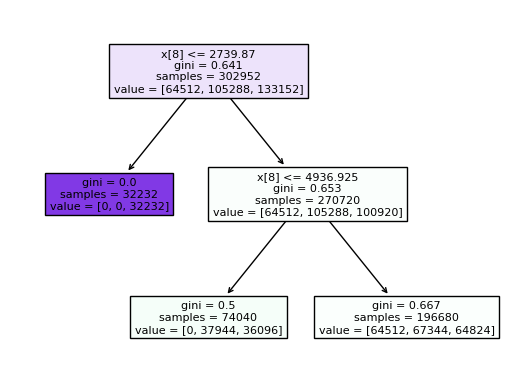

In [14]:
tr.plot_tree(modelo_treinado, filled=True)

## Apresentando o resultado

In [34]:
X_novo = X_atributos.sample()
previsao = (modelo_treinado.predict_proba(X_novo)) * 100

print(f"Aurora: {previsao[0][0]:.2f}% - Nova: {previsao[0][1]:.2f}% -  Start: {previsao[0][2]:.2f}%")

Aurora: 32.80% - Nova: 34.24% -  Start: 32.96%


## Painel de Visualização

In [ ]:
!pip install gradio

In [49]:
import gradio as gr

In [64]:
X_atributos.loc[:, 'salary'].max()

407228.0

In [65]:
def predict(*args):
  X_novo = np.array([args]).reshape(1, -1)
  previsao = (modelo_treinado.predict_proba(X_novo))

  return {"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}



with gr.Blocks() as demo:
  # Título do painel
  gr.Markdown(""" # Propensao de compra """)

  with gr.Row():
    with gr.Column():
      gr.Markdown(""" # Atributos do Cliente """)
      year = gr.Slider(label="year", minimum=2017, maximum=2018, step=1, randomize=True)
      month = gr.Slider(label="month", minimum=1, maximum=12, step=1, randomize=True)
      flights_booked = gr.Slider(label="flights_bookedr", minimum=0, maximum=21, step=1, randomize=True)
      fligts_with_companions = gr.Slider(label="flights_with_companions", minimum=0, maximum=11, step=1, randomize=True)
      total_fligts = gr.Slider(label="total_flights", minimum=0, maximum=32, step=1, randomize=True)
      distance = gr.Slider(label="distance", minimum=0, maximum=6293, step=1, randomize=True)
      points_accumulated = gr.Slider(label="points_accumulated", minimum=0.00, maximum=676.5, step=1, randomize=True)
      salary = gr.Slider(label="salary", minimum=-58486.00, maximum=407228.0, step=1000, randomize=True)
      clv = gr.Slider(label="clv", minimum=2119.89, maximum=83325.38, step=1, randomize=True)

      with gr.Row():
        gr.Markdown(""" # Botão de Previsão """)
        predict_btn = gr.Button(value="Previsao")

    with gr.Column():
      gr.Markdown(""" # Propensão de Compra do Cliente """)
      label = gr.Label()

  # Botao predict
  predict_btn.click(
      fn=predict,
      inputs=[
          year,
          month,
          flights_booked,
          fligts_with_companions,
          total_fligts,
          distance,
          points_accumulated,
          salary,
          clv
      ],
      outputs=[label]
      )

demo.launch(debug=True, share=False)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

Keyboard interruption in main thread... closing server.
